In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import pickle

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [22]:
data = pd.read_csv('/content/Admission_Predict.csv')



In [23]:
data.info 

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [24]:
data.SOP = pd.to_numeric(data.SOP, errors ='coerce')
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Serial No."] = le.fit_transform(data["Serial No."])
data["GRE Score"] = le.fit_transform(data["GRE Score"])
data["TOEFL Score"] = le.fit_transform(data["TOEFL Score"])
data["University Rating"] = le.fit_transform(data["University Rating"])
data["SOP"] = le.fit_transform(data["SOP"])
data["LOR "] = le.fit_transform(data["LOR "])
data["CGPA"] = le.fit_transform(data["CGPA"])
data["Research"] = le.fit_transform(data["Research"])
data["Chance of Admit "] = le.fit_transform(data["Chance of Admit "])

In [26]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,45,26,3,7,7,156,1,54
1,1,32,15,3,6,7,101,1,38
2,2,24,12,2,4,5,32,1,34
3,3,30,18,2,5,3,84,1,42
4,4,22,11,1,2,4,49,0,27


In [27]:
x=data.iloc[:,0:19].values
y=data.iloc[:,19:20].values

In [28]:
x

array([[  0,  45,  26, ..., 156,   1,  54],
       [  1,  32,  15, ..., 101,   1,  38],
       [  2,  24,  12, ...,  32,   1,  34],
       ...,
       [397,  38,  24, ..., 145,   1,  53],
       [398,  20,  11, ...,  95,   0,  29],
       [399,  41,  25, ..., 157,   1,  57]])

In [29]:
y

array([], shape=(400, 0), dtype=float64)

In [30]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,24.81750,15.410000,2.087500,4.800000,4.905000,80.420000,0.547500,34.485000
std,115.614301,11.45107,6.069514,1.143728,2.013737,1.796955,42.974418,0.498362,14.137342
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,16.00000,11.000000,1.000000,3.000000,4.000000,46.000000,0.000000,26.000000
50%,199.500000,25.00000,15.000000,2.000000,5.000000,5.000000,79.500000,1.000000,35.000000
75%,299.250000,33.00000,20.000000,3.000000,6.000000,6.000000,115.250000,1.000000,45.000000
max,399.000000,48.00000,28.000000,4.000000,8.000000,8.000000,167.000000,1.000000,59.000000


<ipython-input-31-64e93544a305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

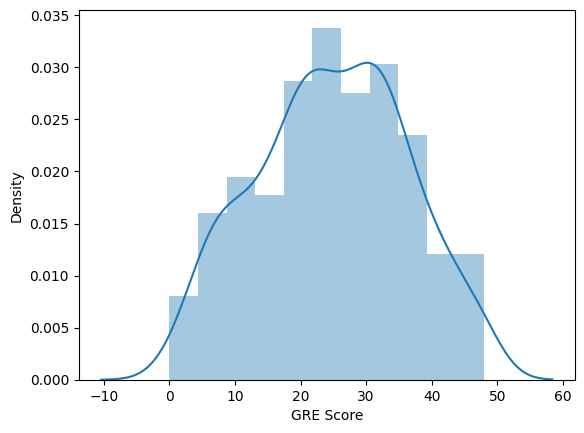

In [31]:
sns.distplot(data['GRE Score'])

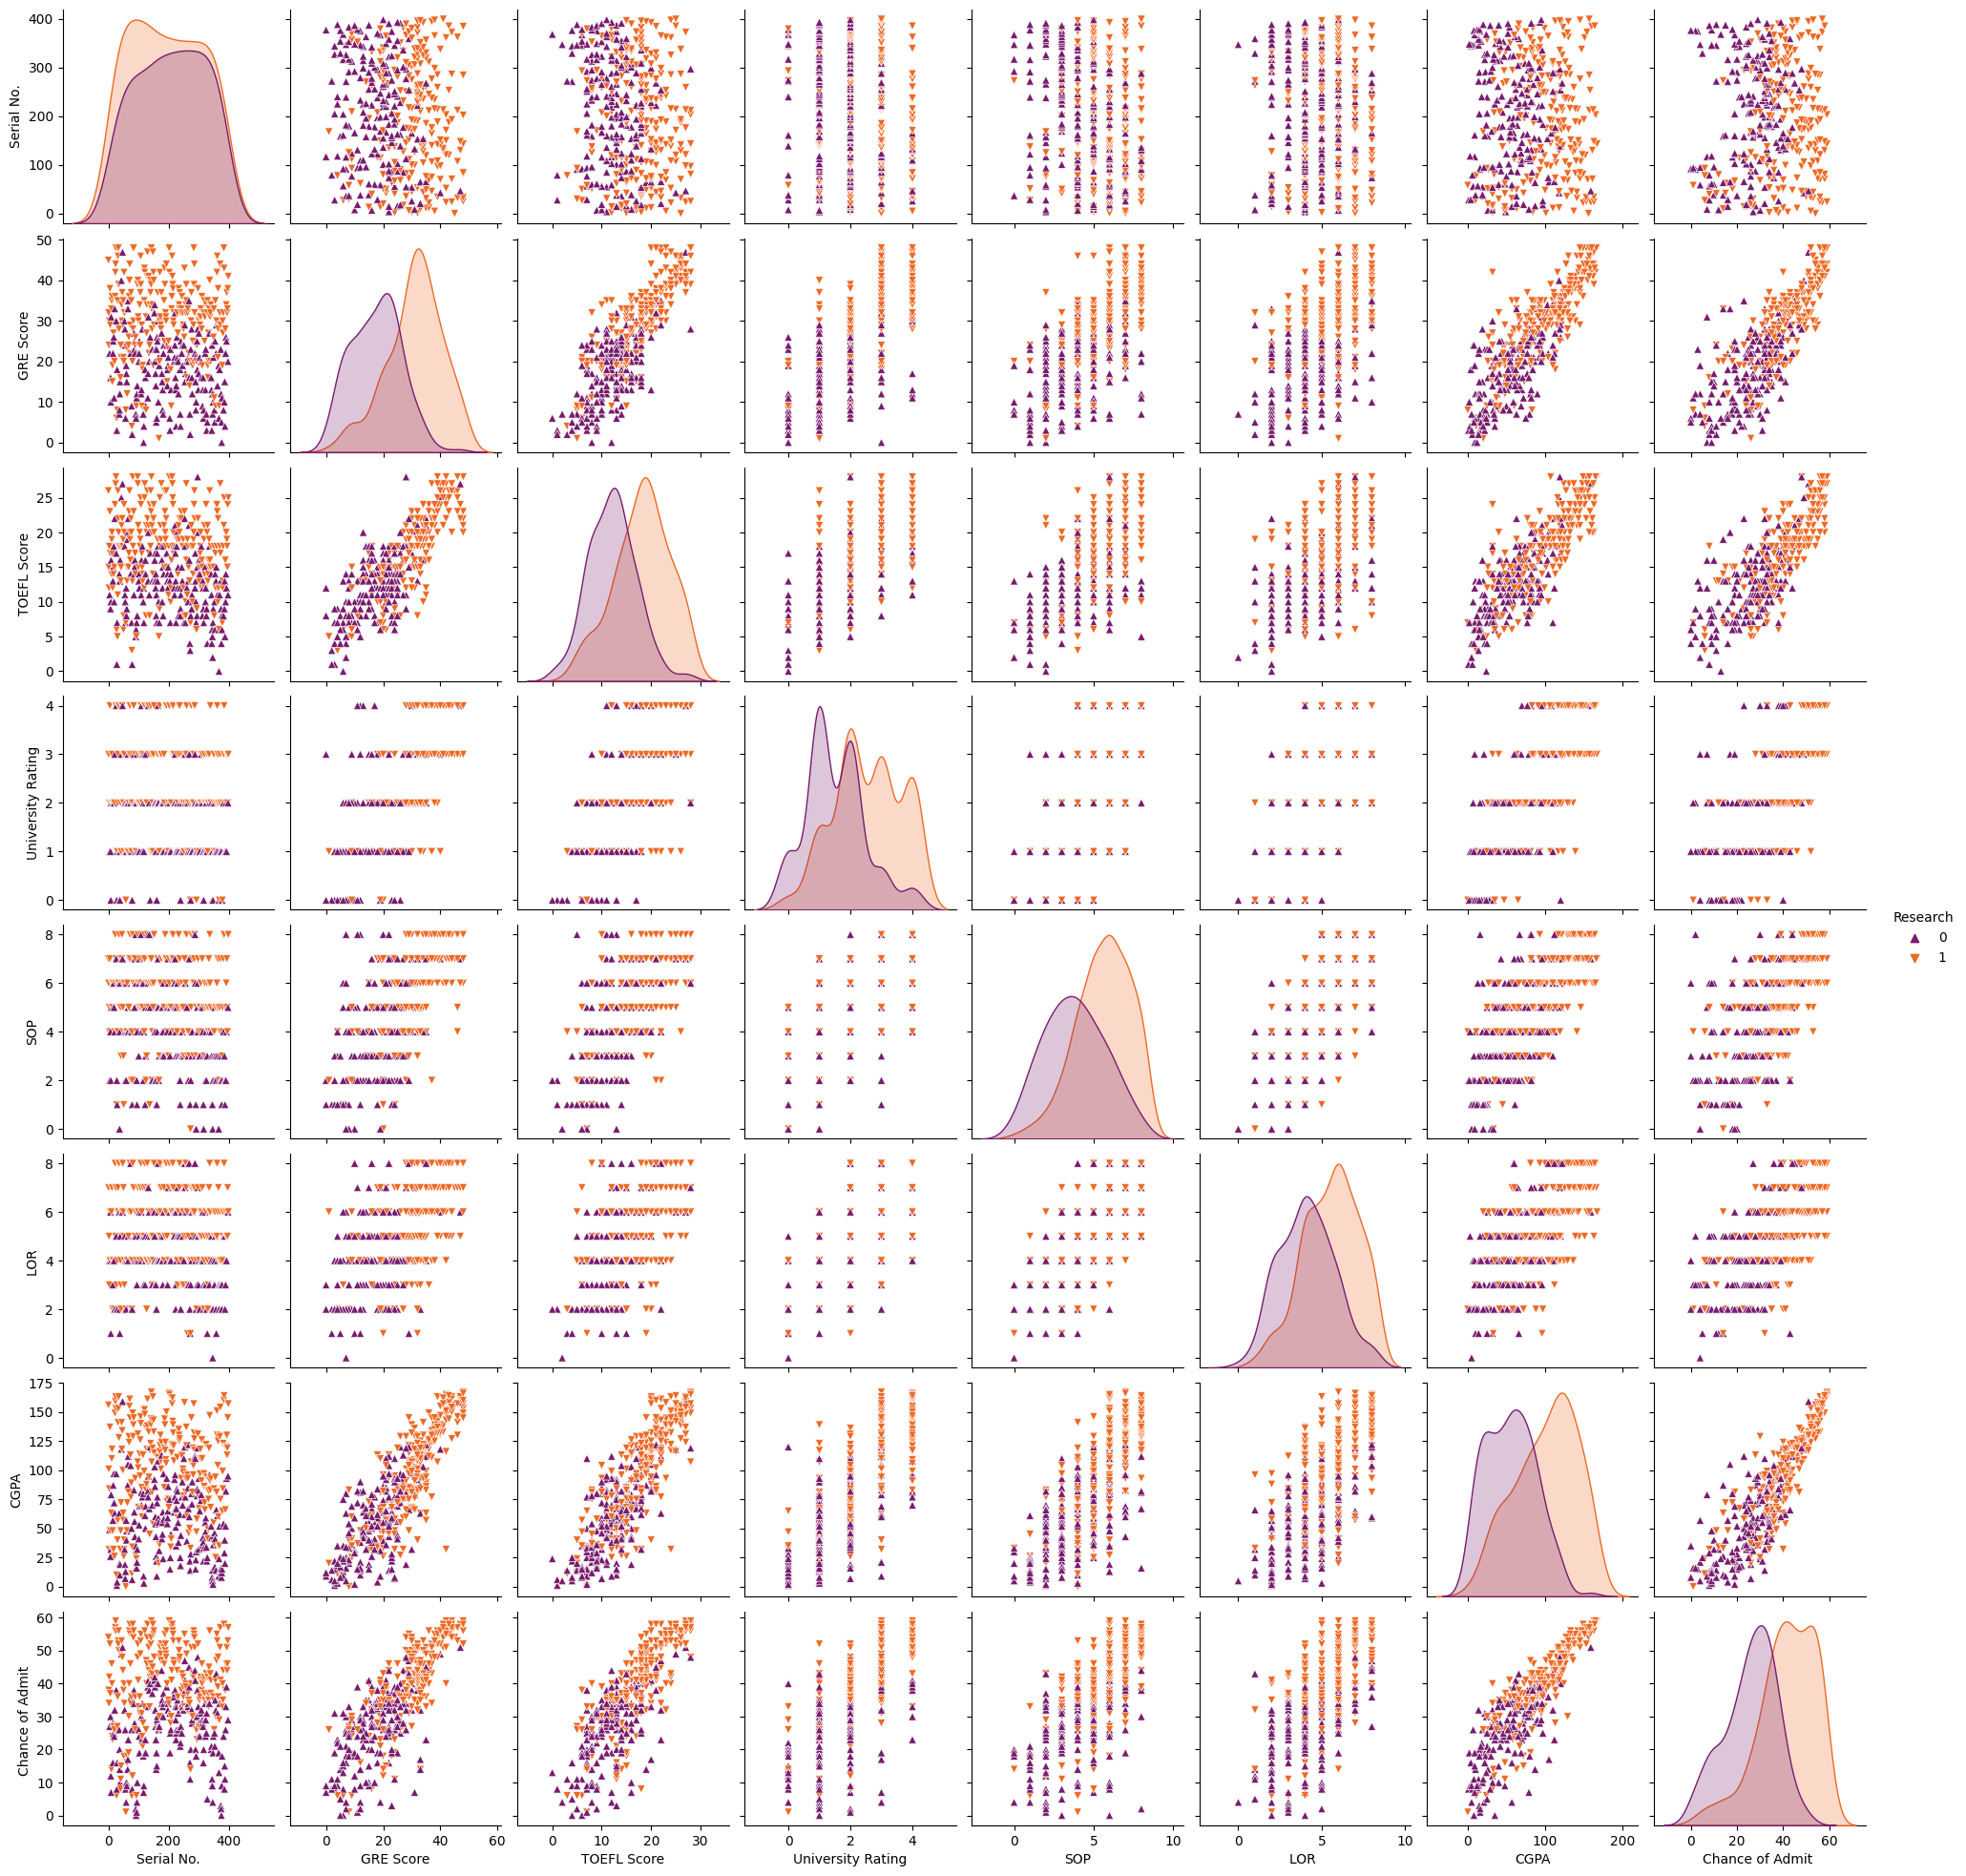

In [32]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

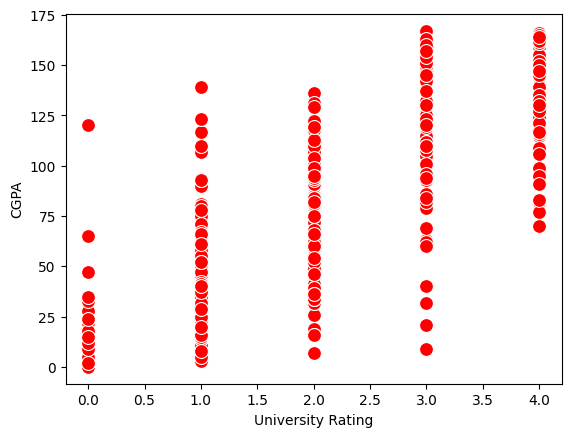

In [33]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='RED',s=100)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
category=['GRE Score','TOEFL Score','University Rating','SOP',' LOR','CGPA','Research','Chance of Admit']
color=['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start=True
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i]].hist(color = color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color = color[2*i+1],bins=10)
  plt.title(category[2*i+1])
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.        , 0.9375    , 0.92857143, ..., 0.93413174, 1.        ,
        0.91525424],
       [0.00250627, 0.66666667, 0.53571429, ..., 0.60479042, 1.        ,
        0.6440678 ],
       [0.00501253, 0.5       , 0.42857143, ..., 0.19161677, 1.        ,
        0.57627119],
       ...,
       [0.99498747, 0.79166667, 0.85714286, ..., 0.86826347, 1.        ,
        0.89830508],
       [0.99749373, 0.41666667, 0.39285714, ..., 0.56886228, 0.        ,
        0.49152542],
       [1.        , 0.85416667, 0.89285714, ..., 0.94011976, 1.        ,
        0.96610169]])

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [52]:
x=data.iloc[:,0:7].values
x

array([[  0,  45,  26, ...,   7,   7, 156],
       [  1,  32,  15, ...,   6,   7, 101],
       [  2,  24,  12, ...,   4,   5,  32],
       ...,
       [397,  38,  24, ...,   8,   7, 145],
       [398,  20,  11, ...,   5,   6,  95],
       [399,  41,  25, ...,   8,   6, 157]])

In [ ]:
y=data.iloc[:,7:].values
y

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [56]:
y_train=(y_train>0.5)
y_train

array([[ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [Fal

In [58]:
y_test=(y_test>0.5)

In [60]:
from sklearn.linear_model.logistic import LogisticRegression
cls =LogisticRegression(random_state =0)

lr=cls.fit(x_train,y_train)

y_pred =lr.predict(x_test)
y_pred

ModuleNotFoundError: ignored

In [61]:
#libraries to train neural network
import tensorflow as tf
from tensorflow import Keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras. optimizers import Adam

ImportError: ignored

In [62]:
#Initialize the model
model=keras.Sequential()

#Add input layer
model.add(Dense(7,activation = 'relu',input_dom=7))

#Add hidden layers
model.add(Dense(7,activation = 'relu'))

#Add output layer
model.add(Dense(1,activation='linear'))

model . summary()



NameError: ignored

In [63]:
model.fit(x_train, y_train, batch_size = 20,epochs = 100)


NameError: ignored

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accurancy'])


In [ ]:
model.fit(x_train, y_train, batch_size = 20,epochs = 100)

In [ ]:
from sklearn.metrics import accuracy_score

#Make predicitions on the training data
train_predictions = model.predict(x_train)

print(train_predictions)




In [ ]:
#Get the test accuracy
test_acc = model.evaluate(x_train, y_train, verbose=0)[]

print(train_acc)


In [ ]:
#Get the test acccuracy
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

print(test_acc)